In [1]:
from os import listdir
from os.path import isfile,join
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam,Nadam,SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import re

import warnings
warnings.filterwarnings("ignore")

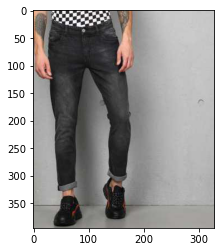

In [8]:
img= image.load_img(r"C:\Users\RAJSHREE\Downloads\Assign. 4\train\Jeans_File\img_25.jpeg")
plt.imshow(img)

In [9]:
cv2.imread(r"C:\Users\RAJSHREE\Downloads\Assign. 4\train\Jeans_File\img_25.jpeg")

array([[[123, 163, 211],
        [126, 166, 214],
        [131, 171, 220],
        ...,
        [198, 198, 198],
        [198, 198, 198],
        [200, 200, 200]],

       [[124, 164, 213],
        [127, 167, 216],
        [132, 172, 221],
        ...,
        [198, 198, 198],
        [198, 198, 198],
        [202, 202, 202]],

       [[126, 164, 218],
        [129, 167, 221],
        [134, 172, 226],
        ...,
        [198, 198, 198],
        [198, 198, 198],
        [204, 204, 204]],

       ...,

       [[152, 157, 156],
        [152, 157, 156],
        [152, 157, 156],
        ...,
        [160, 163, 167],
        [160, 163, 167],
        [160, 163, 167]],

       [[152, 157, 156],
        [152, 157, 156],
        [152, 157, 156],
        ...,
        [160, 163, 167],
        [160, 163, 167],
        [160, 163, 167]],

       [[152, 157, 156],
        [152, 157, 156],
        [152, 157, 156],
        ...,
        [160, 163, 167],
        [160, 163, 167],
        [160, 163, 167]]

In [10]:
cv2.imread(r"C:\Users\RAJSHREE\Downloads\Assign. 4\train\Jeans_File\img_25.jpeg").shape

(395, 329, 3)

In [11]:
train= ImageDataGenerator(rescale=1/255)
validation= ImageDataGenerator(rescale=1/255)

In [12]:
train_dataset=train.flow_from_directory(r"C:\Users\RAJSHREE\Downloads\Assign. 4\train",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

validation_dataset=train.flow_from_directory(r"C:\Users\RAJSHREE\Downloads\Assign. 4\validation",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

Found 960 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [14]:
train_dataset.class_indices

{'Jeans_File': 0, 'Trousers_File': 1}

In [15]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(288, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
def RMSprop_Opt():
    
    #Checkpoint
    checkpoint=ModelCheckpoint(r"C:\Users\RAJSHREE\Downloads\Assign. 4\optimizer_RMSprop.h5",monitor='val_loss',mode='min',save_best_only=True,verbose=1)
    #Earlystop
    earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=4,verbose=1,restore_best_weights=True)
    #Reduce LR
    reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0,patience=3,verbose=1,min_delta=0.0001)
    
    print("\r\r\n\n",'RMSprop')
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001,epsilon=1e-07, name='RMSprop'),metrics=['accuracy'])
    
    callbacks=[earlystop,checkpoint,reduce_lr]
    
    model.fit(train_dataset,steps_per_epoch=15,epochs=9,callbacks=callbacks,validation_data=validation_dataset)

In [18]:
def Adam_Opt():
    
    #Checkpoint
    checkpoint=ModelCheckpoint(r"C:\Users\RAJSHREE\Downloads\Assign. 4\optimizer_Adam.h5",monitor='val_loss',mode='min',save_best_only=True,verbose=1)
    #Earlystop
    earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=4,verbose=1,restore_best_weights=True)
    #Reduce LR
    reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0,patience=3,verbose=1,min_delta=0.0001)
    
    
    print("\r\r\n\n",'Adam')
    model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001,epsilon=1e-07, name='Adam'),metrics=['accuracy'])
    
    callbacks=[earlystop,checkpoint,reduce_lr]
    
    model.fit(train_dataset,steps_per_epoch=15,epochs=9,callbacks=callbacks,validation_data=validation_dataset)

In [23]:
def Nadam_Opt():
    
    #Checkpoint
    checkpoint=ModelCheckpoint(r"C:\Users\RAJSHREE\Downloads\Assign. 4\optimizer_Nadam.h5",monitor='val_loss',mode='min',save_best_only=True,verbose=1)
    #Earlystop
    earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=4,verbose=1,restore_best_weights=True)
    #Reduce LR
    reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0,patience=3,verbose=1,min_delta=0.0001)
    
    
    print("\r\r\n\n",'Nadam')
    model.compile(loss='binary_crossentropy',optimizer=Nadam(lr=0.001, epsilon=1e-07, name='Nadam'),metrics=['accuracy'])
    
    callbacks=[earlystop,checkpoint,reduce_lr]
    
    model.fit(train_dataset,steps_per_epoch=15,epochs=9,callbacks=callbacks,validation_data=validation_dataset)

In [20]:
def SGDM_Opt():
    
    #Checkpoint
    checkpoint=ModelCheckpoint('C:/Users/aarek/mens_pants/optimizer_SGD_Momentum.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1)
    #Earlystop
    earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=4,verbose=1,restore_best_weights=True)
    #Reduce LR
    reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0,patience=3,verbose=1,min_delta=0.0001)
    
    
    print("\r\r\n\n",'SGD_M')
    model.compile(loss='binary_crossentropy',optimizer=SGD(lr=0.001, momentum=0.9),metrics=['accuracy'])
    
    callbacks=[earlystop,checkpoint,reduce_lr]
    
    model.fit(train_dataset,steps_per_epoch=15,epochs=9,callbacks=callbacks,validation_data=validation_dataset)

In [24]:
def NAG_Opt():
    
    
    
    #Checkpoint
    checkpoint=ModelCheckpoint(r"C:\Users\RAJSHREE\Downloads\Assign. 4\optimizer_NAG.h5",monitor='val_loss',mode='min',save_best_only=True,verbose=1)
    #Earlystop
    earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=4,verbose=1,restore_best_weights=True)
    #Reduce LR
    reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0,patience=3,verbose=1,min_delta=0.0001)
    
    
    print("\r\r\n\n",'NAG')
    model.compile(loss='binary_crossentropy',optimizer=SGD(lr=0.001, nesterov=True),metrics=['accuracy'])
    
    callbacks=[earlystop,checkpoint,reduce_lr]
    
    model.fit(train_dataset,steps_per_epoch=15,epochs=9,callbacks=callbacks,validation_data=validation_dataset)
    
    

In [16]:
optimization_functions=[RMSprop_Opt(),Adam_Opt(),Nadam_Opt(),SGDM_Opt(),NAG_Opt()]

for optimizer in (optimization_functions):
    optimizer
    



 RMSprop
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 10 steps
Epoch 1/9
14/15 [===========================>..] - ETA: 1s - loss: 43.6562 - accuracy: 0.5714
Epoch 00001: val_loss improved from inf to 2.73410, saving model to C:/Users/aarek/mens_pants/optimizer_RMSprop.h5
15/15 [==============================] - 30s 2s/step - loss: 40.7458 - accuracy: 0.6000 - val_loss: 2.7341 - val_accuracy: 0.5000
Epoch 2/9
14/15 [===========================>..] - ETA: 1s - loss: 3.5292 - accuracy: 0.5476
Epoch 00002: val_loss improved from 2.73410 to 2.27678, saving model to C:/Users/aarek/mens_pants/optimizer_RMSprop.h5
15/15 [==============================] - 29s 2s/step - loss: 3.3673 - accuracy: 0.5556 - val_loss: 2.2768 - val_accuracy: 0.5000
Epoch 3/9
14/15 [===========================>..] - ETA: 1s - loss: 1.7162 - accuracy: 0.4048
Epoch 00003: val_loss improved from 2.27678 to 1.11484, saving model to C:/Users/aarek/mens_pants/optimizer_RMSprop.h5
15/15

14/15 [===========================>..] - ETA: 2s - loss: 0.8187 - accuracy: 0.8333
Epoch 00007: val_loss did not improve from 0.46942
15/15 [==============================] - 32s 2s/step - loss: 0.7911 - accuracy: 0.8222 - val_loss: 1.3507 - val_accuracy: 0.6000
Epoch 8/9
14/15 [===========================>..] - ETA: 2s - loss: 0.1470 - accuracy: 0.9524
Epoch 00008: val_loss did not improve from 0.46942
15/15 [==============================] - 33s 2s/step - loss: 0.1407 - accuracy: 0.9556 - val_loss: 1.2093 - val_accuracy: 0.6000
Epoch 9/9
14/15 [===========================>..] - ETA: 2s - loss: 0.6030 - accuracy: 0.8095
Epoch 00009: val_loss improved from 0.46942 to 0.42056, saving model to C:/Users/aarek/mens_pants/optimizer_Nadam.h5
15/15 [==============================] - 44s 3s/step - loss: 0.5648 - accuracy: 0.8222 - val_loss: 0.4206 - val_accuracy: 0.8333


 SGD_M
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 10 steps
Epoch 1/9
14/15 [=======

In [23]:
classifier = tf.keras.models.load_model(r'C:\Users\RAJSHREE\Downloads\Assign. 4\optimizer_Nadam.h5')

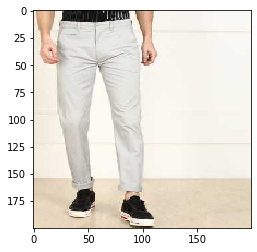

jeans


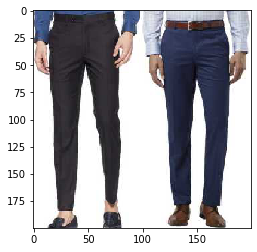

trouser


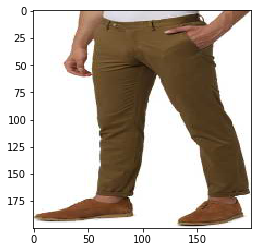

trouser


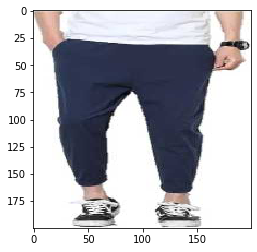

trouser


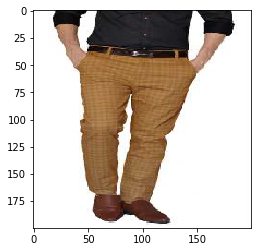

trouser


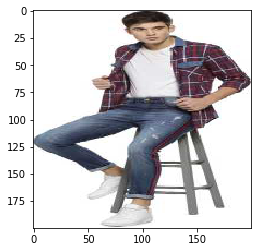

trouser


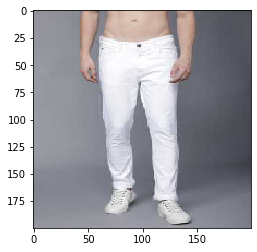

trouser


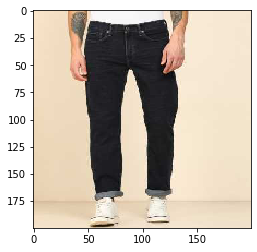

trouser


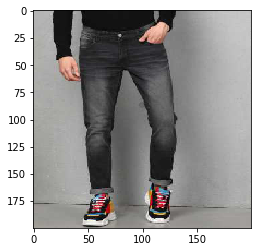

jeans


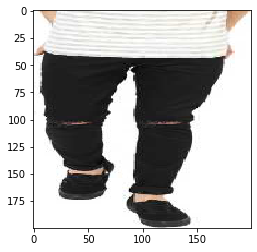

jeans


In [24]:
#Model Prediction
dir_path=(r"C:\Users\RAJSHREE\Downloads\Assign. 4\test")
for i in os.listdir(dir_path):
    pic=image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(pic)
    plt.show()
    
    X= image.img_to_array(pic)
    X= np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=classifier.predict(images)
    
    if val==0:
        print("jeans")
    else:
        print("trouser")
